# SVM Solutions


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [2]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# YOUR CODE HERE

data = pd.read_csv(url, names=names)

# Drop NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


Split data into training, validation, and test sets with a test size of 25%

In [3]:
# YOUR CODE HERE

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [4]:
# YOUR CODE HERE

svm_high = SVC(gamma=1)
svm_high.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Print accuracy of training and validation data

In [5]:
# YOUR CODE HERE

y_train_high_pred=svm_high.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_high_pred)*100)
y_val_high_pred=svm_high.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_high_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.56756756756756


Create a model with sklearn's SVC and a high low value (perhaps .001)

In [6]:
# YOUR CODE HERE

svm_low = SVC(gamma=.001)
svm_low.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print accuracy of training and validation data

In [7]:
# YOUR CODE HERE

y_train_low_pred=svm_low.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_low_pred)*100)
y_val_low_pred=svm_low.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_low_pred)*100)

Training Accuracy is  87.27272727272727
Validation Accuracy is  74.32432432432432


Explain the accuracy results below. 

(YOUR ANSWER HERE) 
<br></br>
high gamma value overfit on the training data
but low gamma value performed better on validation set

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

In [8]:
# Visualize the confusion matrix
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap='BuPu')
    plt.title('\n'+title+'\n', fontsize=20)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels, fontsize=16)
    ax.set_yticklabels([''] + labels, fontsize=16)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('True', fontsize=16)
    plt.show()

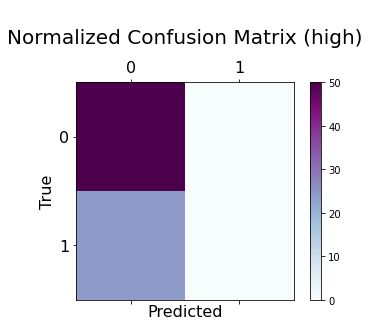

[[1. 0.]
 [1. 0.]]


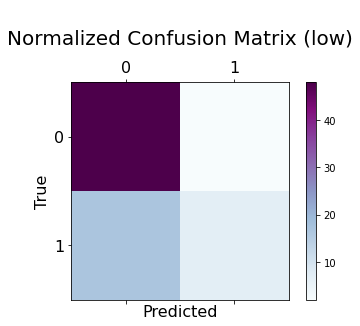

[[0.96       0.04      ]
 [0.70833333 0.29166667]]


In [9]:
# Confusion matrices

# Normalized confusion matrix (high gamma)
cm_high = metrics.confusion_matrix(y_val, y_val_high_pred, [0,1])
cm_high_norm = cm_high.astype('float') / cm_high.sum(axis=1)[:, np.newaxis]
plot_cmatrix(cm_high,[0,1],title='Normalized Confusion Matrix (high)')
print(cm_high_norm)

# Normalized confusion matrix (low gamma)
cm_low = metrics.confusion_matrix(y_val, y_val_low_pred, [0,1])
cm_low_norm = cm_low.astype('float') / cm_low.sum(axis=1)[:, np.newaxis]
plot_cmatrix(cm_low,[0,1],title='Normalized Confusion Matrix (low)')
print(cm_low_norm)